# 五王之战分析 - 冰与火之歌

## 简介

五王之战（War of the Five Kings）是著名严肃奇幻小说《冰与火之歌》中的著名内战。这是一场规模空前、波及七大王国的内乱。顾名思义，前后共有五人在战争中称王：乔佛里、史坦尼斯、蓝礼均声称自己是铁王座的合法继承人。除此之外，罗柏·史塔克被北境众封臣推选为北境之王，巴隆·葛雷乔伊亦再度掀起独立大旗，欲摆脱铁王座的统治，自称为铁群岛之王。



本数据集(battles.csv)包含了五王之战期间的战争，它是所有战斗的大集合。该数据是Kaggle中[Game of Thrones](https://www.kaggle.com/mylesoneill/game-of-thrones)的一部分。

数据中的变量含义解释：
```
name: 战争的名称，字符变量。
year: 战争发生的年份，数值变量。
battle_number: 本数据中的unique id，对应每一场独立的战役，数值变量。
attacker_king: 攻击方的国王，"/"表示了国王的更换。例如："Joffrey/Tommen Baratheon"意味着Tomen Baratheon继承了Joffrey的王位，分类变量。
defender_king: 防守方的国王，分类变量。
attacker_1: 攻击方将领，字符变量。
attacker_2: 攻击方将领，字符变量。
attacker_3: 攻击方将领，字符变量。
attacker_4: 攻击方将领，字符变量。
defender_1: 防守方将领，字符变量。
defender_2: 防守方将领，字符变量。
defender_3: 防守方将领，字符变量。
defender_4: 防守方将领，字符变量。
attacker_outcome: 从攻击方角度来看的战争结果，分别有：win, loss, draw，分类变量。
battle_type: 战争的类别。pitched_battle: 双方军队在一个地点相遇并战斗，这也是最基本的战争类别；ambush: 以隐身或诡计为主要攻击手段的战争；siege: 阵地战；razing: 对未设防位置的攻击。分类变量。
major_death: 是否有重要人物的死亡，二进制变量。
major_capture: 是否有重要人物的被捕，二进制变量。
attacker_size: 攻击方力量的大小，并未对骑兵、步兵等士兵种类有所区分，数值变量。
defender_size: 防守方力量的大小，并未对骑兵、步兵等士兵种类有所区分，数值变量。
attacker_commander: 攻击方的主要指挥官。指挥官的名字中并没有包含头衔，不同的指挥官名字用逗号隔开，字符变量。
defender_commander: 防守方的主要指挥官。指挥官的名字中并没有包含头衔，不同的指挥官名字用逗号隔开，字符变量。
summer: 战争是否发生于夏天，二进制变量。
location: 战争发生的地点，字符变量。
region: 战争发生的地域，包括：Beyond the Wall, The North, The Iron Islands, The Riverlands, The Vale of Arryn, The Westerlands, The Crownlands, The Reach, The Stormlands, Dorne，分类变量。
note: 注释，字符变量。

```

## 提出问题

在此项目中，你将以一名数据分析师的身份执行数据的探索性分析。你将了解数据分析过程的基本流程。在你分析数据之前，请先思考几个你需要理解的关于这些战斗的问题，例如，哪一个区域发生了最多的战争？哪一个国王获得了最多的胜利？战争的胜利与否受那些关键因素的影响？

**问题**：请写下你感兴趣的问题，请确保这些问题能够由现有的数据进行回答。
（为了确保学习的效果，请确保你的数据分析报告中能够包含2幅可视化和1个相关性分析。）

**答案**：<br>
**问题1:** 哪一个区域发生了最多的战争？<br>
**问题2:** 哪一个将领获得了最多的胜利？<br>
**问题3:** 哪一种 Battle Type 获胜比例比较高？<br>
**问题4:** Attacker size 和 defender size 之间关系如何？

## 数据评估和清理

In [78]:
# TO DO: load pacakges
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

In [79]:
# TO DO: load the dataset
df = pd.read_csv('battles.csv')
df.head(3)

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN


In [80]:
# TO DO: check the dataset general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
name                  38 non-null object
year                  38 non-null int64
battle_number         38 non-null int64
attacker_king         36 non-null object
defender_king         35 non-null object
attacker_1            38 non-null object
attacker_2            10 non-null object
attacker_3            3 non-null object
attacker_4            2 non-null object
defender_1            37 non-null object
defender_2            2 non-null object
defender_3            0 non-null float64
defender_4            0 non-null float64
attacker_outcome      37 non-null object
battle_type           37 non-null object
major_death           37 non-null float64
major_capture         37 non-null float64
attacker_size         24 non-null float64
defender_size         19 non-null float64
attacker_commander    37 non-null object
defender_commander    28 non-null object
summer                37 non-null flo

In [81]:
# TO DO: clean the data (optional: only there are problems)
df.dropna(axis=1, how="all",inplace=True)
df.head(3)

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN


删除掉了所有值都是Null的列

In [82]:
df.duplicated(subset='battle_number').sum()

0

确认没有冗余数据

## 数据探索分析

**问题1:** 哪一个区域发生了最多的战争

In [83]:
df['location'].value_counts()

Riverrun                                3
Winterfell                              3
Darry                                   2
Deepwood Motte                          2
Harrenhal                               2
Torrhen's Square                        2
Moat Cailin                             2
Storm's End                             2
Ruby Ford                               1
Shield Islands                          1
Oxcross                                 1
Whispering Wood                         1
Crag                                    1
Saltpans                                1
Castle Black                            1
Stony Shore                             1
Red Fork                                1
Green Fork                              1
Golden Tooth                            1
The Twins                               1
Mummer's Ford                           1
Ryamsport, Vinetown, Starfish Harbor    1
Seagard                                 1
Duskendale                        

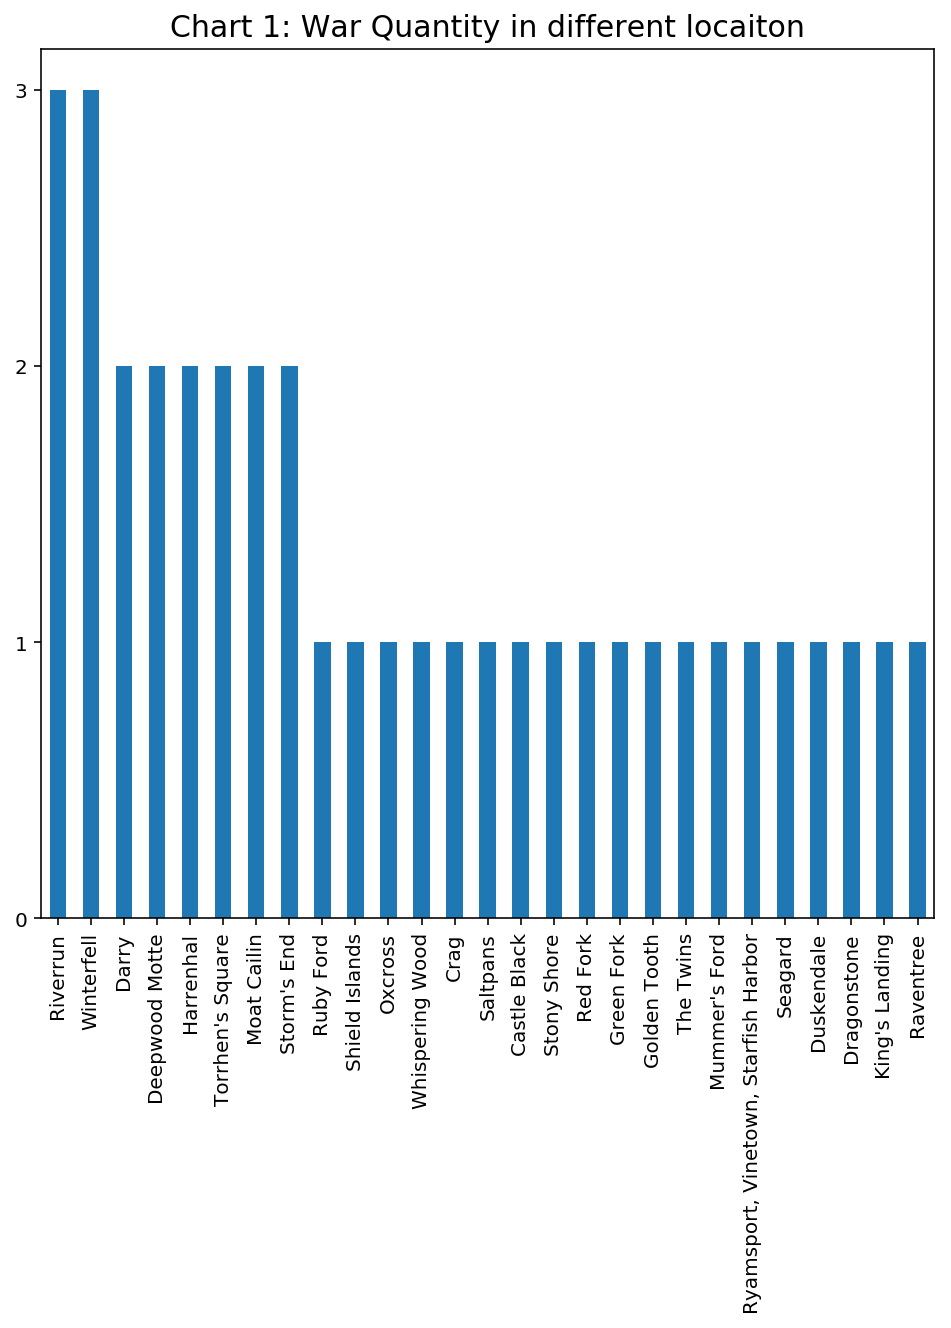

In [84]:
location = df['location'].value_counts()
location.plot(kind='bar',figsize=(8,8),yticks=range(4),fontsize=10)
plt.title('Chart 1: War Quantity in different locaiton',size=15);

**问题2:** 哪一个将领获得了最多的胜利？

In [85]:
# 定义函数 split_col 用于拆分某列中的数据
def split_col(origin_df,col_name,split_key):
    s = origin_df[col_name].str.split(split_key, expand=True).stack()
    i = s.index.get_level_values(0)
    df2 = origin_df.loc[i].copy()
    df2[col_name] = s.values
    return df2

In [86]:
df_new = split_col(df,'attacker_commander',',')
df_new.attacker_commander = df_new.attacker_commander.str.strip()
df_new.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,Jaime Lannister,"Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,Andros Brax,"Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,Roose Bolton,"Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN


在 df_new 中 battle_number 3 已经被拆分成两行，每行分别对应一位 attacker_commander

In [87]:
df_new.loc[df_new.attacker_outcome =='win',:].attacker_commander.value_counts()

Robb Stark           4
Gregor Clegane       4
Jaime Lannister      4
Victarion Greyjoy    3
Theon Greyjoy        3
Brynden Tully        3
Stannis Baratheon    2
Euron Greyjoy        2
Roose Bolton         2
Walder Frey          2
Helman Tallhart      1
Black Walder Frey    1
Cley Cerwyn          1
Davos Seaworth       1
Ramsay Snow          1
Dagmer Cleftjaw      1
Mace Tyrell          1
Rorge                1
Jonos Bracken        1
Loras Tyrell         1
Asha Greyjoy         1
Rodrik Cassel        1
Vargo Hoat           1
Walder Rivers        1
Mathis Rowan         1
Smalljon Umber       1
Andros Brax          1
Raxter Redwyne       1
Daven Lannister      1
Robett Glover        1
Tytos Blackwood      1
Ryman Fey            1
Alysane Mormot       1
Ramsey Bolton        1
Name: attacker_commander, dtype: int64

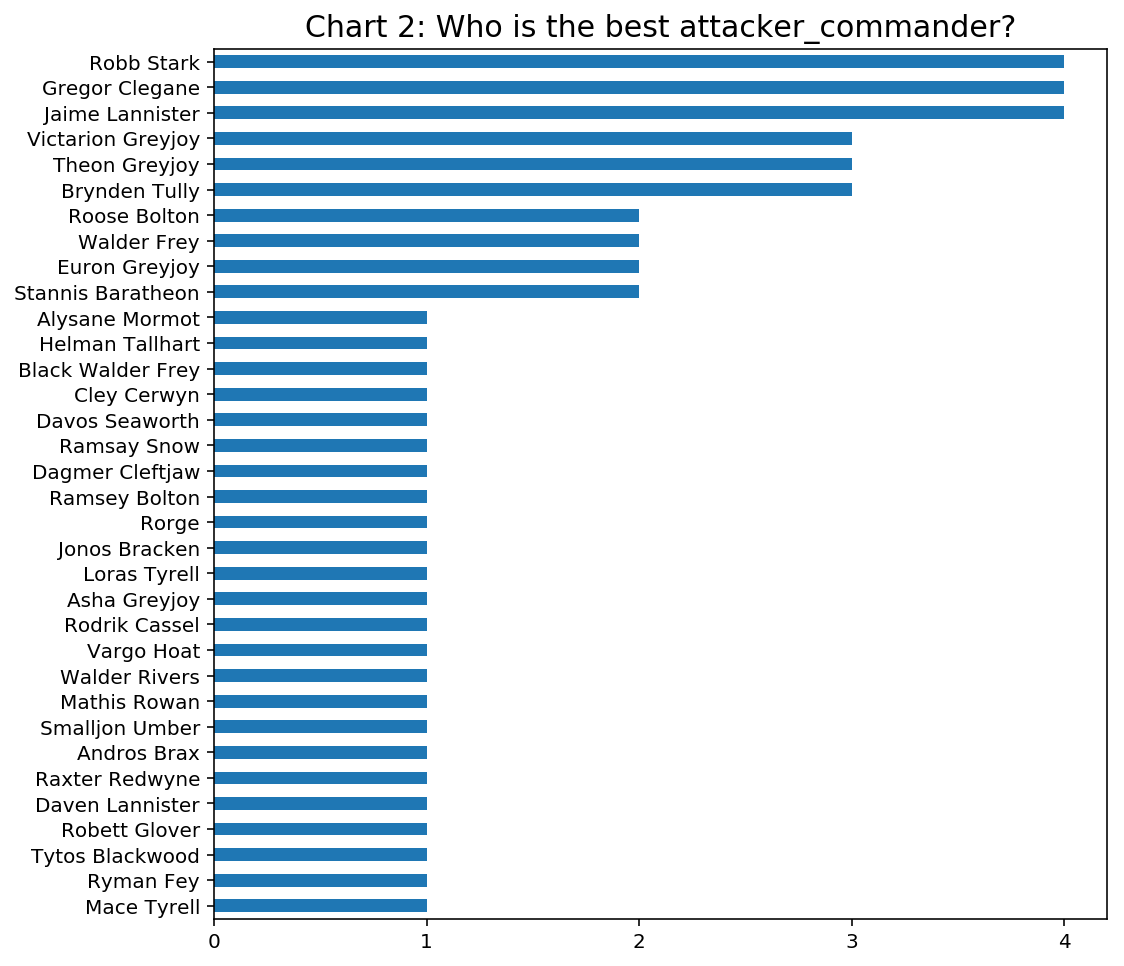

In [88]:
attacker_commander_won = df_new.loc[df_new.attacker_outcome =='win',:].attacker_commander.value_counts()
attacker_commander_won.sort_values().plot(kind="barh",xticks=range(5),fontsize=10,figsize=(8,8))
plt.title('Chart 2: Who is the best attacker_commander?',size=15);

按照胜利场次对 attacker_commander 排序并绘制柱状图

**问题3:** 哪一种 Battle Type 获胜比例比较高？

In [89]:
df.battle_type.value_counts()

pitched battle    14
siege             11
ambush            10
razing             2
Name: battle_type, dtype: int64

查看共有多少种 Battle Type

In [90]:
df.groupby(['attacker_outcome','battle_type']).size().unstack(fill_value=0)

battle_type,ambush,pitched battle,razing,siege
attacker_outcome,,,,
loss,0,4,0,1
win,10,10,2,10


查看各类 Battle Type 的胜负情况

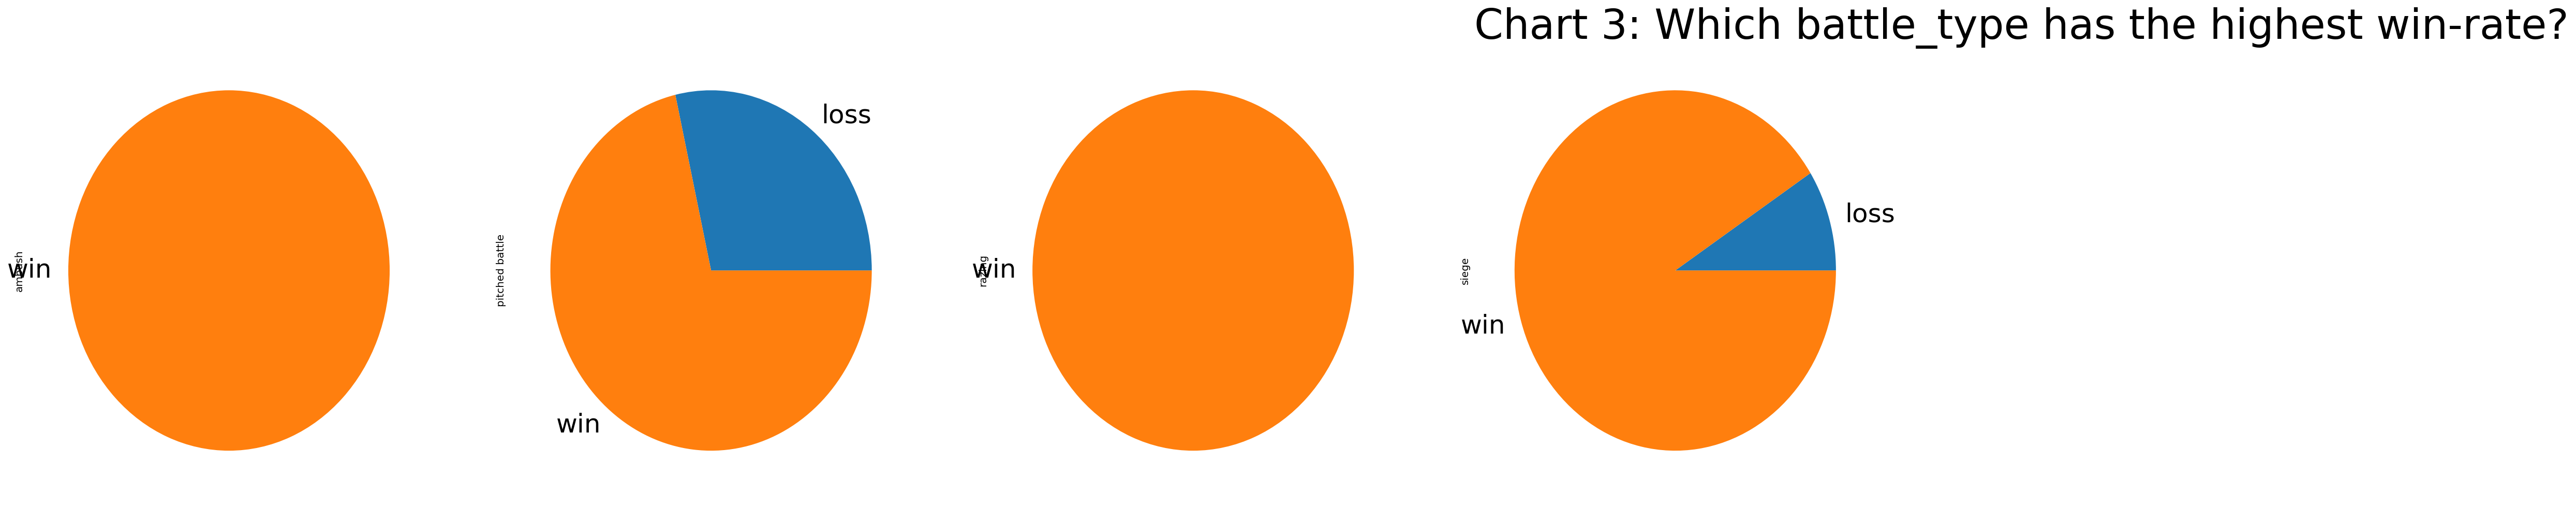

In [91]:
battle_type_outcome = df.groupby(['attacker_outcome','battle_type']).size().unstack(fill_value=0)
battle_type_outcome.plot(kind = 'pie',subplots=True,fontsize=25,figsize=(32,8), legend=False)
plt.title('Chart 3: Which battle_type has the highest win-rate?',size=40,loc='left');

为各类 Battle Type 的胜负情况，绘制饼状图。

**问题4:** Attacker size 和 Defender size 之间关系如何？

In [92]:
df_size = df.loc[:,['attacker_size','defender_size']]
df_size.shape

(38, 2)

选取原来数据中的 attacker_size 和 defender_size 列组成需要分析的数据

In [93]:
df_size.dropna(how='any',inplace=True)
df_size.shape

(16, 2)

清理了数据中的空值

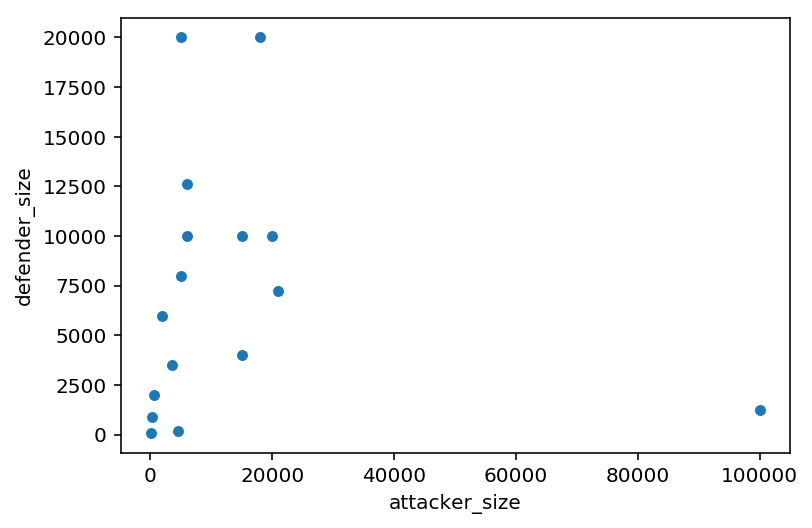

In [94]:
df_size.plot(x='attacker_size',y = 'defender_size',kind='scatter');

图中可以看出 attacker_size 的最大值为异常值，需要将异常值剔除

In [95]:
df_size = df_size.loc[df_size.attacker_size < df_size.attacker_size.max(),: ]
df_size

,attacker_size,defender_size
0,15000.0,4000.0
2,15000.0,10000.0
3,18000.0,20000.0
4,1875.0,6000.0
5,6000.0,12625.0
10,244.0,900.0
13,618.0,2000.0
14,6000.0,10000.0
15,5000.0,20000.0
16,20000.0,10000.0


r-squared:0.19
p_value:1.018430e-01


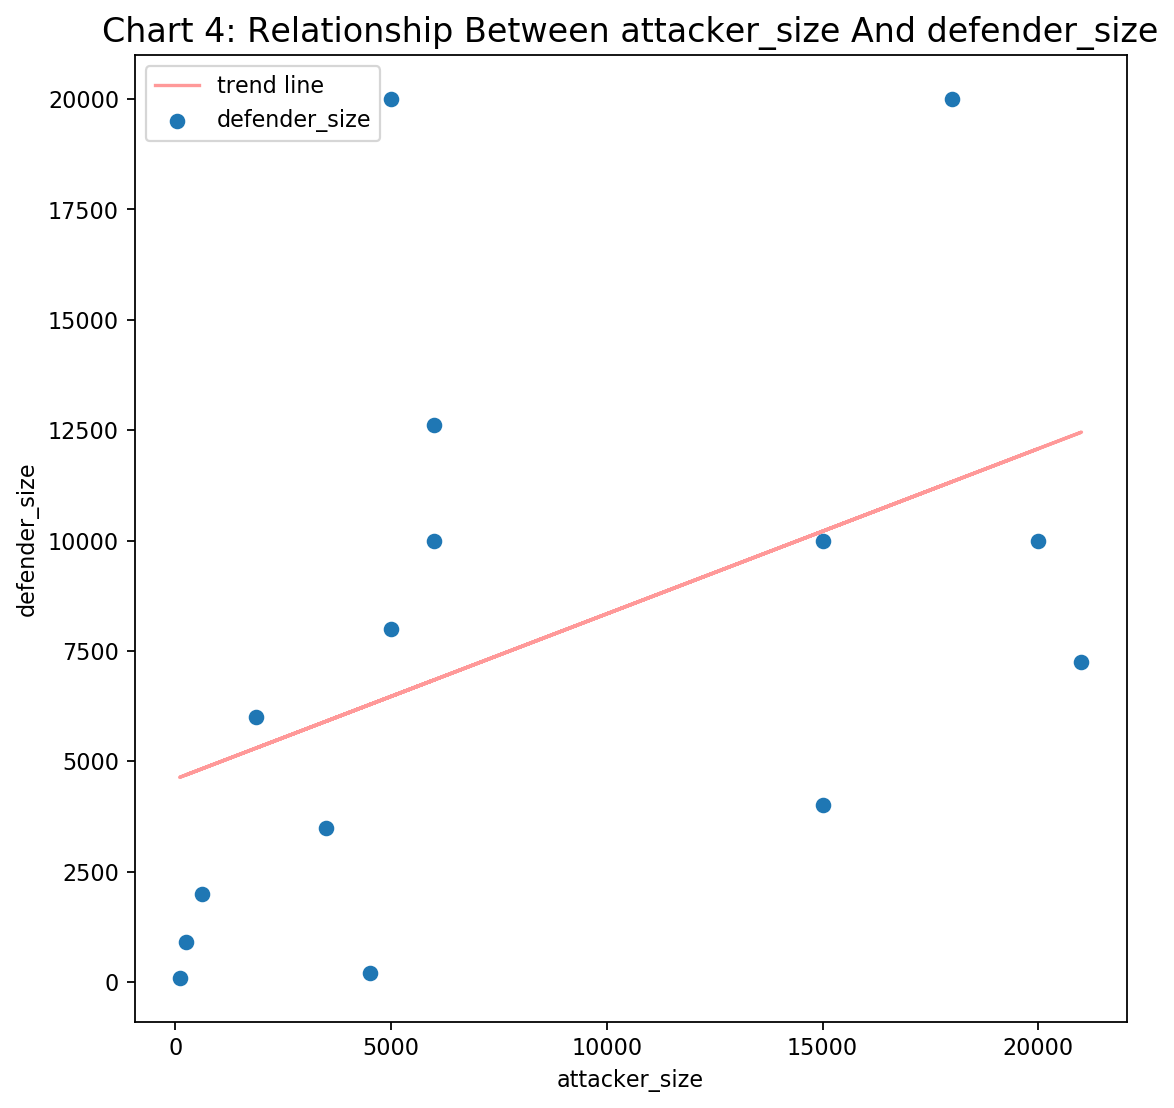

In [96]:
q4_x = df_size['attacker_size']
q4_y = df_size['defender_size']

plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(q4_x, q4_y)
slope, intercept, r_value,p_value= stats.linregress(q4_x, q4_y)[:4]
plt.plot(q4_x,intercept+slope*q4_x,"r",alpha=0.4,label='trend line')

plt.legend(loc=2)
plt.xlabel('attacker_size')
plt.ylabel('defender_size')
plt.title('Chart 4: Relationship Between attacker_size And defender_size', size = 15);

print("r-squared:%.2f"%(r_value**2))
print("p_value:%e"%(p_value))

绘制出 attacker_size 和 defender_size 的散点图，两者的 r-squared 是0.25，P_value 是 6.776312e-02。

## 得出结论

**说明**： 所得结论为描述性分析，并不能代表数据之间具有因果关系。

**问题1:** 哪一个区域发生了最多的战争？<br>
**答案:** 由 Chart 1 可得出，在 Riverrun 和 Winterfell 发生的战争最多， 数量为3次。


**问题2:** 哪一个将领获得了最多的胜利？<br>
**答案:** 由 Chart 2 可得出，攻击将领 Gregor Clegane，Robb Stark，Jaime Lannister获胜战争场次最多， 数量为4次。

**问题3:** 哪一种 Battle Type 获胜比例比较高？<br>
**答案:** 由 Chart 3 可得出，Battle Type 为 ambush 和 razing 获胜比例为100%， 其中 ambush 获胜10场，razing 获胜2场。

**问题4:** Attacker size 和 defender size 之间关系如何？<br>
**答案:** 由 Chart 4 可得出，attacker_size 和 defender_size 呈现弱相关性，两者的 r-squared 是0.25，P_value 是 6.776312e-02。

## 反思

**问题**：在你的分析和总结过程中是否存在逻辑严谨。是否有改进的空间? 你可以从下面的一些角度进行思考：
1. 数据集是否完整，包含所有想要分析的数据？
2. 在对数据进行处理的时候，你的操作（例如删除/填充缺失值）是否可能影响结论？
3. 是否还有其他变量（本数据中没有）能够对你的分析有帮助？
4. 在得出结论时，你是否混淆了相关性和因果性？

**答案**：得出结论时，明确了数据之间没有因果性，逻辑分析严谨。清理数据操作没有影响到结论。